In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
tf.config.experimental.list_physical_devices('GPU')
import datetime
from keras.models import Sequential
from keras.layers import Conv2D, Dense, AveragePooling2D, Dropout, Flatten

<h1>Extract MNIST data</h1>

In [2]:
#get mnist data, with one_hot encoding
mnist = tf.keras.datasets.mnist.load_data(path="mnist.npz")
(train_images, train_labels), (test_images, test_labels) = mnist
tl = train_labels
train_images = train_images.astype("float32")/255.0
test_images = test_images.astype("float32")/255.0
train_labels = tf.one_hot(train_labels,depth=10)
test_labels = tf.one_hot(test_labels, depth=10)

<h1>Prepare training, validation and testing data</h1>

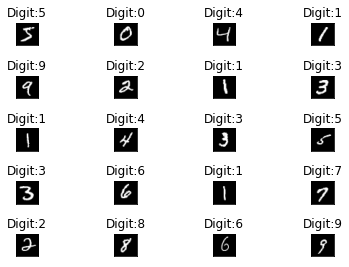

(60000, 32, 32, 1)


In [3]:
#pad images with 0s (28x28 to 32x32)
x_train = np.pad(train_images, ((0,0),(2,2),(2,2)), 'constant')
x_test = np.pad(test_images, ((0,0),(2,2),(2,2)), 'constant')
def plot_digits(X, Y):
    for i in range(20):
        plt.subplot(5, 4, i+1)
        plt.tight_layout()
        plt.imshow(X[i].reshape(32, 32), cmap='gray')
        plt.title('Digit:{}'.format(Y[i]))
        plt.xticks([])
        plt.yticks([])
    plt.show()
plot_digits(x_train, tl)
x_train = x_train.reshape(x_train.shape[0], 32, 32, 1)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 1)
print(x_train.shape)

In [4]:
print(x_train.shape, train_labels.shape)
print(x_test.shape, test_labels.shape)

(60000, 32, 32, 1) (60000, 10)
(10000, 32, 32, 1) (10000, 10)


<h1>Define LeNet-5</h1>

In [7]:
"""
Define Lenet-5 model
"""
model = Sequential()
# convolution 1
model.add(Conv2D(filters=6, kernel_size=(5,5), strides=1, activation="tanh", input_shape=(32, 32, 1)))
# pooling 1 (subsampling)
# model.add(AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# convolution 2
model.add(Conv2D(filters=16, kernel_size=(5,5), strides=1, activation="tanh", padding="valid"))
# pooling 2 (subsampling)
# model.add(AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# flatten the convolution to connect with full connectted layer
model.add(Flatten())
# Fully connected layer
model.add(Dense(84, activation="tanh"))
# output layer
model.add(Dense(10, activation="softmax"))

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=["accuracy"],
)

model.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 16)        2416      
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 84)                774228    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                850       
Total params: 777,650
Trainable params: 777,650
Non-trainable params: 0
_________________________________________________________________


<h1>Training, validating, testing</h1>
<h2>1. Print out validation accuracy after each training epoch</h2>
<h2>2. Print out training time on each epoch</h2>
<h2>3. Print out testing accuracy</h2>

In [8]:
history = model.fit(x_train, train_labels, batch_size=128, epochs=15, validation_data=(x_test, test_labels))

Epoch 1/15
469/469 [==============================] - 3s 5ms/step - loss: 0.2510 - accuracy: 0.9276 - val_loss: 0.1501 - val_accuracy: 0.9559
Epoch 2/15
469/469 [==============================] - 2s 5ms/step - loss: 0.1289 - accuracy: 0.9629 - val_loss: 0.1118 - val_accuracy: 0.9654
Epoch 3/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0894 - accuracy: 0.9742 - val_loss: 0.0814 - val_accuracy: 0.9751
Epoch 4/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0665 - accuracy: 0.9800 - val_loss: 0.0698 - val_accuracy: 0.9788
Epoch 5/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0543 - accuracy: 0.9844 - val_loss: 0.0572 - val_accuracy: 0.9819
Epoch 6/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0484 - accuracy: 0.9857 - val_loss: 0.0624 - val_accuracy: 0.9798
Epoch 7/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0426 - accuracy: 0.9871 - val_loss: 0.0641 - val_accuracy: 0.9792
Epoch 

In [9]:
model.evaluate(x_test, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0516 - accuracy: 0.9821


[0.051570139825344086, 0.9821000099182129]

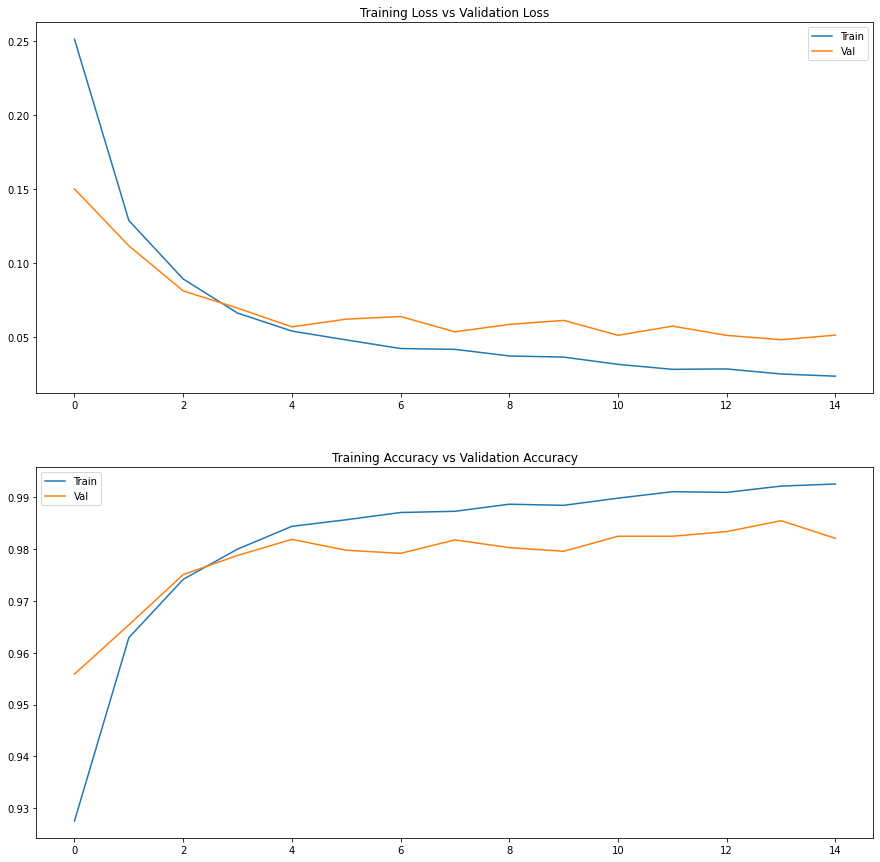

In [10]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))
axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].legend(['Train', 'Val'])
axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].legend(['Train', 'Val'])